In [223]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import steplib as msl
%matplotlib inline

In [224]:
PATH = "Data"
all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(PATH) for f in filenames if os.path.splitext(f)[1] == '.txt']
# Create pairs of consecutive files
file_pairs = [(all_files[i], all_files[i + 1]) for i in range(len(all_files) - 1)]

# Print the pairs
for pair in file_pairs:
    print(f"Pair: {pair[0]} and {pair[1]}")

Pair: Data\P001\Irregular\P001_Irregular.txt and Data\P001\Irregular\steps.txt
Pair: Data\P001\Irregular\steps.txt and Data\P001\Regular\P001_Regular.txt
Pair: Data\P001\Regular\P001_Regular.txt and Data\P001\Regular\steps.txt
Pair: Data\P001\Regular\steps.txt and Data\P001\SemiRegular\P001_Semiregular.txt
Pair: Data\P001\SemiRegular\P001_Semiregular.txt and Data\P001\SemiRegular\steps.txt
Pair: Data\P001\SemiRegular\steps.txt and Data\P002\Irregular\P002_Irregular.txt
Pair: Data\P002\Irregular\P002_Irregular.txt and Data\P002\Irregular\steps.txt
Pair: Data\P002\Irregular\steps.txt and Data\P002\Regular\P002_Regular.txt
Pair: Data\P002\Regular\P002_Regular.txt and Data\P002\Regular\steps.txt
Pair: Data\P002\Regular\steps.txt and Data\P002\SemiRegular\P002_Semiregular.txt
Pair: Data\P002\SemiRegular\P002_Semiregular.txt and Data\P002\SemiRegular\steps.txt
Pair: Data\P002\SemiRegular\steps.txt and Data\P003\Irregular\P003_Irregular.txt
Pair: Data\P003\Irregular\P003_Irregular.txt and Dat

In [225]:
meter_df = pd.read_csv(file_pairs[0][0], sep=' ')
steps_df = pd.read_csv(file_pairs[0][1], sep=' ')

In [226]:
start = 0
end = len(meter_df)

In [256]:
import numpy as np


def getSteps(file_pair):
    meter = pd.read_csv(file_pair[0], sep=' ')
    steps = pd.read_csv(file_pair[1], sep=' ').iloc[:, 0]
    data1 = meter.iloc[:, 6] ** 2 + meter.iloc[:, 7] ** 2 + meter.iloc[:, 8] ** 2
    accelerometer = data1.apply(lambda x: x ** 0.5)
    data1 = msl.apply_filter(accelerometer, [-0.00614041469794508,	-0.0135816744769618,	0.0512322973427179,	0.265655560905451,	0.405668461853476,	0.265655560905451,	0.0512322973427179,	-0.0135816744769618,-0.00614041469794508])
    data1 = msl.modified_pan_tompkins_scoring(data1, 35)
    data1 = msl.detect_outliers(data1, 1.2)
    data1 = msl.post_processing(data1, 200, 15)
    indices = np.where(data1 == 1)[0]


    return indices, steps , accelerometer

In [249]:
def chart(data_in):
    (calculated, expected, accelerometer) = data_in
    x=range(len(accelerometer))
    y=accelerometer
    plt.figure(figsize=(10,5))
    plt.plot(x,y, color='red', marker='o')
    plt.xlabel('index')
    plt.ylabel('magnitude')
    #show x label every 800
    plt.xticks(x[::500])
    plt.xticks(rotation=90)
    #add rectangles
    for e in expected:
        plt.axvline(x =e, color ='g', label ='axvline - full height', ymin=0.5, alpha=0.8)
    for c in calculated:
        plt.axvline(x =c, color ='b', label ='axvline - full height', ymax=0.5, alpha=0.8)
    plt.show()

In [229]:
data = meter_df.iloc[:, 0]**2 + meter_df.iloc[:, 1]**2 + meter_df.iloc[:, 2]**2
data = data.apply(lambda x: x**0.5)



In [230]:
#apply filter 0.0158467315853596	0.0457943754888393	0.121235976281198	0.200244477464560	0.233756878360087	0.200244477464560	0.121235976281198	0.0457943754888393	0.0158467315853596
data = msl.apply_filter(data, [0.0158467315853596,0.0457943754888393,0.121235976281198,0.200244477464560,0.233756878360087,0.200244477464560,0.121235976281198,0.0457943754888393,0.0158467315853596])
#chart(data)

In [231]:
data = msl.maximum_difference(data, 35)

In [232]:
data = msl.detect_outliers(data, 1.2)
#chart(data)

In [233]:

data = msl.post_processing(data, 200, 15)
#chart(data)

In [252]:
chart(getSteps(file_pairs[8]))

In [265]:
for i in range(0,len(file_pairs),2):
    (calculated, expected, _) = getSteps(file_pairs[i])
    
    print(i, len(expected), len(calculated), file_pairs[i][0])

0 198 150 Data\P001\Irregular\P001_Irregular.txt
2 936 480 Data\P001\Regular\P001_Regular.txt
4 702 289 Data\P001\SemiRegular\P001_Semiregular.txt
6 216 211 Data\P002\Irregular\P002_Irregular.txt
8 1223 581 Data\P002\Regular\P002_Regular.txt
10 646 239 Data\P002\SemiRegular\P002_Semiregular.txt
12 223 145 Data\P003\Irregular\P003_Irregular.txt
14 1052 527 Data\P003\Regular\P003_Regular.txt
16 715 265 Data\P003\SemiRegular\P003_Semiregular.txt
18 227 185 Data\P004\Irregular\P004_Irregular.txt
20 1100 499 Data\P004\Regular\P004_Regular.txt
22 613 288 Data\P004\SemiRegular\P004_Semiregular.txt
24 216 181 Data\P005\Irregular\P005_Irregular.txt
26 1043 536 Data\P005\Regular\P005_Regular.txt
28 667 273 Data\P005\SemiRegular\P005_Semiregular.txt
30 194 162 Data\P006\Irregular\P006_Irregular.txt
32 913 472 Data\P006\Regular\P006_Regular.txt
34 700 368 Data\P006\SemiRegular\P006_Semiregular.txt
36 222 210 Data\P007\Irregular\P007_Irregular.txt
38 1228 612 Data\P007\Regular\P007_Regular.txt
40 7

KeyboardInterrupt: 

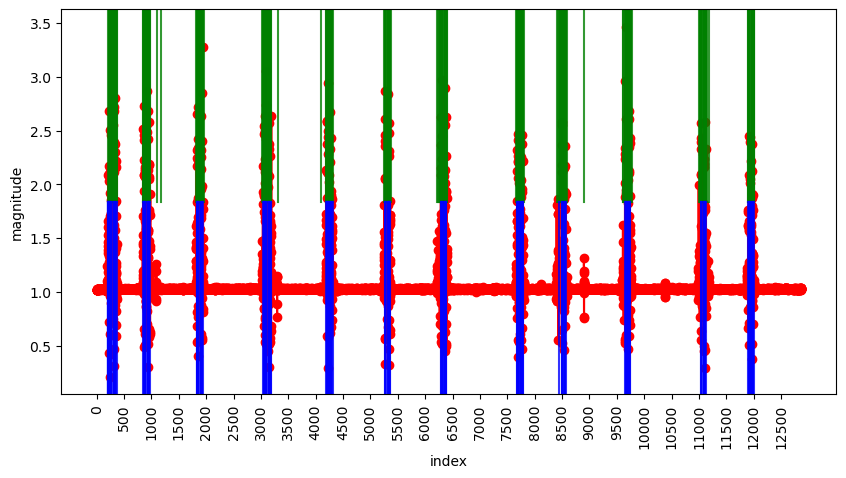

In [264]:
%matplotlib inline
chart(getSteps(file_pairs[30]))